In [29]:
import numpy as np
import cv2
import colorsys

In [31]:
hist = np.genfromtxt('histogram/skin_color_histogram_16.csv', delimiter=',')

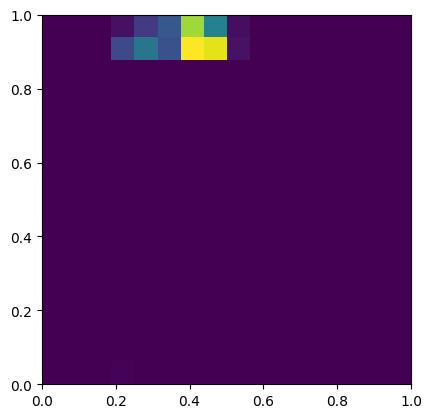

In [32]:
#plot histogram
import matplotlib.pyplot as plt
plt.imshow(hist, interpolation='nearest', extent=[0, 1, 0, 1])
plt.show()

In [33]:
img = cv2.imread('test/Hand_0000003.jpg')
img_hsi = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

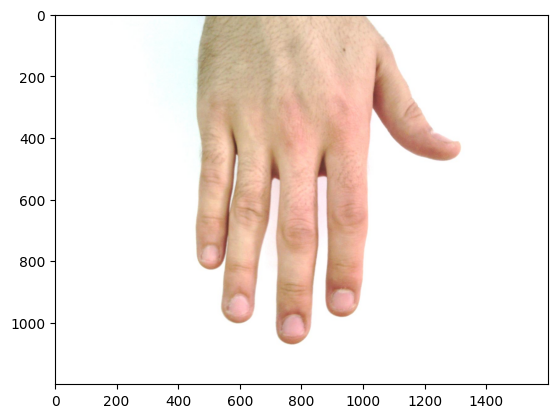

In [34]:
#convert image from gbr to rgb 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#show image
plt.imshow(img_rgb)
plt.show()

In [35]:
h_channel = img_hsi[:, :, 0] / 180.0
s_channel = img_hsi[:, :, 1] / 255.0

In [36]:
# Use (H, S) to index the 2D histogram
threshold = 0.001
count = 0
skin_mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        h = h_channel[i, j]
        s = s_channel[i, j]
        skin_hist = hist[int(h * (hist.shape[0]-1)), int(s * (hist.shape[1]-1))]
        if skin_hist >= threshold:
            count += 1
            skin_mask[i, j] = 255

In [37]:
#apply closing to fill holes
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_CLOSE, kernel)
#do opening
skin_mask = cv2.morphologyEx(skin_mask, cv2.MORPH_OPEN, kernel)

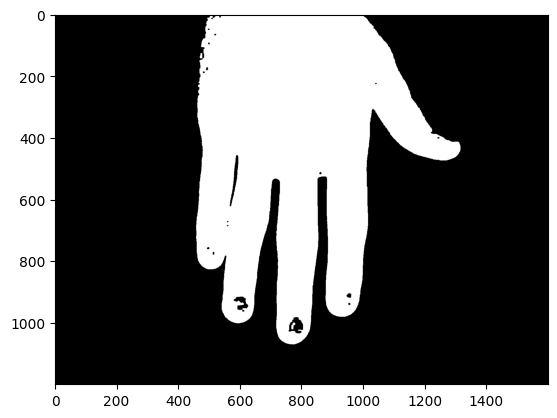

In [38]:
#plot skin mask
import matplotlib.pyplot as plt
plt.imshow(skin_mask, cmap='gray')
plt.show()

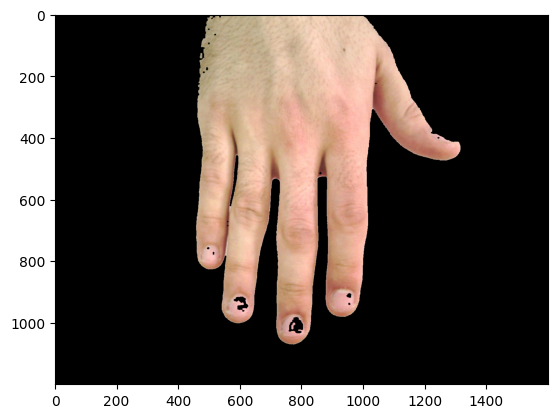

In [39]:
#apply mask to img_rgb
masked_img = cv2.bitwise_and(img_rgb, img_rgb, mask=skin_mask)

#plot masked image
plt.imshow(masked_img)
plt.show()
